# TP 2 

## *Étude des rendements en profondeur dans l'eau*

**Contacts :**

- Verónica Sorgato: [veronica.sorgato88@gmail.com](mailto:veronica.sorgato88@gmail.com)
- Samy Kefs: [samy.kefs@inserm.fr](mailto:samy.kefs@inserm.fr)
- Yannick Arnoud: [yannick.arnoud@lpsc.in2p3.fr](mailto:yannick.arnoud@lpsc.in2p3.fr)

---
**Données :**

1. À partir du site du NIST, récupérer dans un fichier Excel, les coefficients d’atténuation (mu_att) et d’absorption en énergie (mu_en) du PMMA (Polyméthyl Méthacrylate) en fonction de l’énergie des photons.

---

## **Question 2**

Affichage des valeurs mu_att et mu_en en fonction de l'énergie en échelle doublement logarithmique

In [1]:
# Import the libraries we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tabulate as tab



In [3]:
# Read the data from the file
df = pd.read_excel('/Users/samy/Desktop/PhD/TP_Dosimetrie_M2/TP02/DataPMMA.xlsx')

# Store the data in numpy arrays more relevant to use
energy = df['energy'].to_numpy()
mu_att = df['mu/rho  (cm2/g)'].to_numpy()
mu_en = df['muen/rho (cm2/g)'].to_numpy()



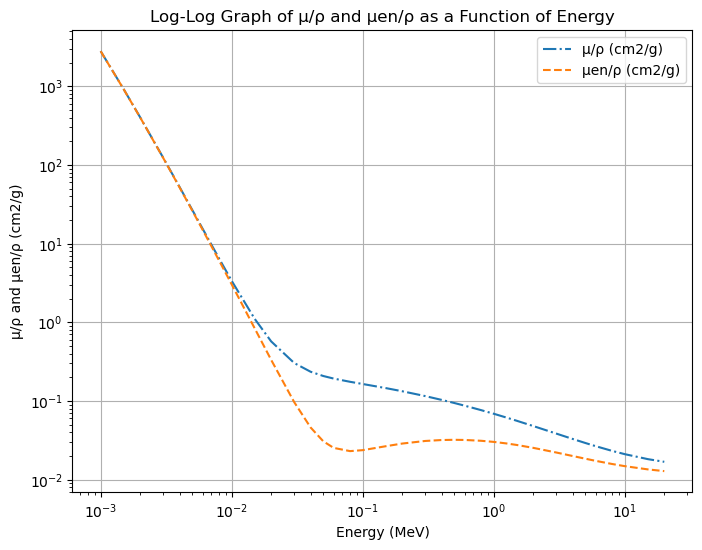

In [4]:
# Create the log-log graph
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.loglog(energy, mu_att, label='μ/ρ (cm2/g)',linestyle="-.")  # Create a log-log graph for μ/ρ
plt.loglog(energy, mu_en, label='μen/ρ (cm2/g)',linestyle='--')  # Create a log-log graph for μen/ρ

# Add axis, title labels and a legend
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ and μen/ρ (cm2/g)')
plt.title('Log-Log Graph of μ/ρ and μen/ρ as a Function of Energy')
plt.legend()

# Display the graph
plt.grid(True)  # Add a grid for better readability
plt.show()


---
## **Question 2**

2. Ajuster ces points par un modèle linéaire, et afficher sur le même graphe cette courbe d’ajustement. Commenter.

---

In [5]:
# For exemple 
energyv2 = np.array([10, 20, 30, 40, 50])  # Énergies en keV
mu_attv2 = np.array([0.05, 0.1, 0.15, 0.2, 0.25])  # Coefficients d'atténuation en cm^-1

# see which one is faster just a test
%timeit energyv3 = energyv2[...,None]


%timeit energyv3 = energyv2.reshape(-1, 1)




55.9 ns ± 0.464 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
87.9 ns ± 0.824 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Rappel

La régression linéaire est une technique d'analyse statistique visant à établir une relation linéaire entre une variable dépendante (ou cible) et une ou plusieurs variables indépendantes (ou caractéristiques). Mathématiquement, une régression linéaire simple (avec une seule variable indépendante) peut être représentée comme suit :

```
Y = β0 + β1X + ε
```

- `Y` est la variable dépendante que nous cherchons à prédire.
- `X` est la variable indépendante (caractéristique) utilisée pour faire la prédiction.
- `β0` est l'intercept, représentant la valeur de `Y` lorsque `X` est égal à zéro.
- `β1` est le coefficient de régression, mesurant la relation linéaire entre `X` et `Y`. Il représente la pente de la droite de régression.
- `ε` est le terme d'erreur, représentant l'erreur résiduelle non expliquée par le modèle. Il s'agit de la différence entre la valeur réelle de `Y` et la valeur prédite par le modèle.

L'objectif de la régression linéaire est de trouver les valeurs optimales de `β0` et `β1` de manière à minimiser la somme des carrés des erreurs (`ε`). Cette technique est souvent appelée la "méthode des moindres carrés" (OLS - Ordinary Least Squares).

En régression linéaire multiple, lorsque vous avez plusieurs variables indépendantes, l'équation devient :

```
Y = β0 + β1X1 + β2X2 + ... + βpXp + ε
```

- `X1, X2, ..., Xp` représentent les différentes caractéristiques.
- `β0, β1, β2, ..., βp` sont les coefficients correspondants à chaque caractéristique.

L'objectif demeure le même : minimiser la somme des carrés des erreurs en ajustant les coefficients `β` de manière à obtenir la meilleure adéquation entre le modèle et les données observées. Une fois que le modèle est ajusté, il peut être utilisé pour faire des prédictions sur de nouvelles données en utilisant la relation linéaire établie.

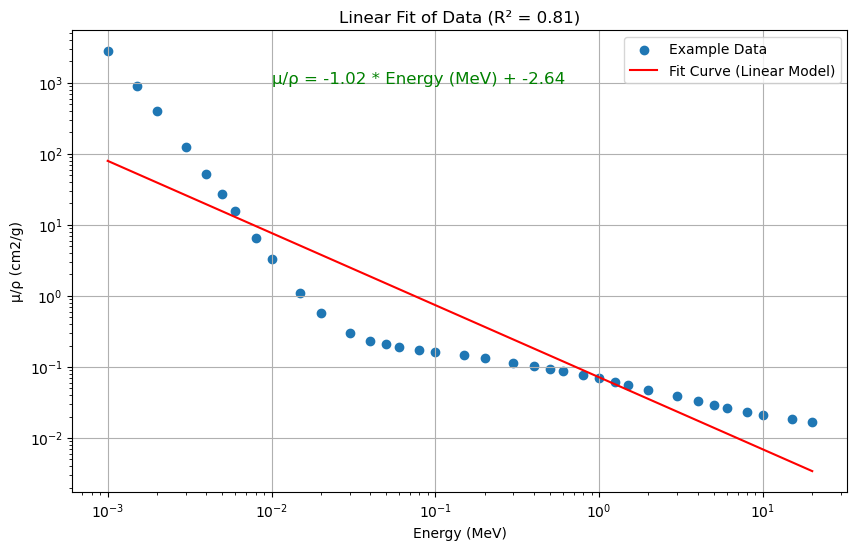

In [6]:
# Import the LinearRegression class from the sklearn.linear_model module.
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model.
model = LinearRegression()

# Transform the 'energy' and 'mu_att' arrays into 2D arrays.
energy1 = np.log(energy[..., None])
mu_att1 = np.log(mu_att[..., None])

# Train the model using the 'energy1' as input and 'mu_att1' as output.
model.fit(energy1, mu_att1)

# Predict the fitted values using the trained model.
mu_att_pred = model.predict(energy1)

# Calculate the coefficient of determination (R²)
r_squared = model.score(energy1, mu_att1)

energy1 = np.exp(energy1)
mu_att1 = np.exp(mu_att1)
mu_att_pred = np.exp(mu_att_pred)


# Create a figure for visualization with a specific size.
plt.figure(figsize=(10, 6))

# Scatter plot of the original data points ('energy1' vs. 'mu_att1').
plt.scatter(energy1, mu_att1, label='Example Data')

# Plot the linear regression curve on the same graph in red.
plt.plot(energy1, mu_att_pred, color='red', label='Fit Curve (Linear Model)')

# Set the x and y axes to logarithmic scale.
plt.xscale('log')
plt.yscale('log')

# Add a legend to the graph.
plt.legend()

# Set a title for the graph.
plt.title(f'Linear Fit of Data (R² = {r_squared:.2f})') 

# Label the x and y axes.
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')

# Enable gridlines on the graph.
plt.grid(True)

# Display the equation of the linear fit on the plot.
equation = f'μ/ρ = {model.coef_[0][0]:.2f} * Energy (MeV) + {model.intercept_[0]:.2f}'
plt.text(0.01, 1000, equation, fontsize=12, color='green')

# Display the graph.
plt.show()


---
## **Question 3**

3. Tester d’autres types d’ajustement. Au vu des graphiques obtenus, êtes-vous satisfaits du résultat ? Vous pouvez prendre comme référence d’une courbe au comportement « sain » celle affichée sur le site NIST.
---

### Rappel

La classe `PolynomialFeatures` de scikit-learn est utilisée pour générer des caractéristiques polynomiales à partir de caractéristiques existantes dans un ensemble de données. Son objectif est d'étendre l'ensemble de caractéristiques en ajoutant des termes polynomiaux aux caractéristiques d'origine. Cela permet de modéliser des relations non linéaires entre les caractéristiques et la variable cible en utilisant une régression linéaire ou d'autres modèles linéaires.

**Mathématiquement**, supposons que vous ayez une seule caractéristique X. L'objectif est de transformer cette caractéristique en un ensemble de caractéristiques polynomiales d'un degré donné. Voici comment cela fonctionne :

1. Supposons que vous souhaitiez créer des caractéristiques polynomiales de degré 2. La transformation serait la suivante :
   - Caractéristique d'origine : X
   - Caractéristiques polynomiales de degré 2 : X^2

2. La transformation crée une nouvelle matrice de caractéristiques avec deux colonnes :
   - La première colonne contient les valeurs d'origine de X.
   - La deuxième colonne contient les valeurs de X^2.

3. Vous pouvez maintenant utiliser ces nouvelles caractéristiques pour effectuer une régression linéaire, ce qui permet de modéliser des relations quadratiques entre X et la variable cible.


De manière générale, vous pouvez spécifier le degré souhaité (par exemple, 2 pour des caractéristiques quadratiques) lorsque vous créez une instance de `PolynomialFeatures`. La classe effectue alors les transformations nécessaires pour générer ces caractéristiques polynomiales, ce qui permet d'adapter des modèles linéaires à des données qui présentent des relations non linéaires en les transformant en problèmes linéaires à l'aide de caractéristiques polynomiales.

## Mise en Garde

Il est essentiel de prendre en compte que les ajustements doivent être utilisés avec discernement. Leur utilisation dépend grandement de l'objectif recherché dans l'analyse des données. Si l'objectif est de déterminer les paramètres d'une fonction spécifique, il est recommandé d'effectuer des ajustements en ayant une connaissance préalable du modèle à ajuster, plutôt que de procéder de manière aveugle. Cela permet une approche plus précise.

Cependant, si le problème consiste à estimer des valeurs en se basant sur un jeu de données sans connaissance préalable du modèle, il est généralement plus judicieux d'utiliser des méthodes d'interpolation, telles que l'interpolation linéaire ou d'autres méthodes d'interpolation. Ces méthodes sont plus adaptées pour estimer des valeurs entre les points de données existants, en préservant les tendances globales des données sans imposer de modèle spécifique. Il est important de choisir la méthode qui convient le mieux à la nature des données et à l'objectif de l'analyse.

(36, 4)


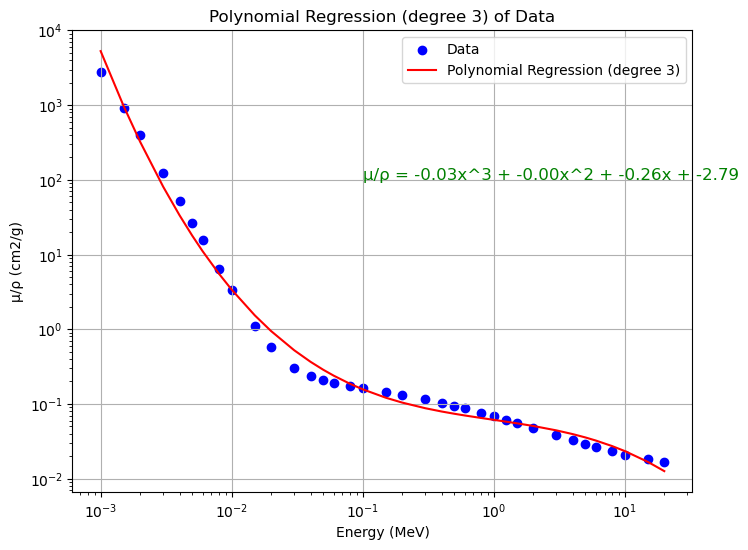

In [7]:
from sklearn.preprocessing import PolynomialFeatures


# Data
x = np.log(np.copy(energy))
y = np.log(np.copy(mu_att))

# Create a polynomial regression model of degree 3
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x.reshape(-1, 1))

print(x_poly.shape)
model = LinearRegression()
model.fit(x_poly, y)

# Predict the fitted values
y_pred = model.predict(x_poly)

# Inverse log-transform to get predictions on the original scale
x = np.exp(x)
y_pred = np.exp(y_pred)
y= np.exp(y)
# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_pred, label='Polynomial Regression (degree 3)', color='red')
plt.xscale('log')
plt.yscale('log')   
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.title('Polynomial Regression (degree 3) of Data')
plt.legend()
plt.grid(True)

# Display the equation of the polynomial fit on the plot
equation = f'μ/ρ = {model.coef_[3]:.2f}x^3 + {model.coef_[2]:.2f}x^2 + {model.coef_[1]:.2f}x + {model.intercept_:.2f}'
plt.text(0.1, 100, equation, fontsize=12, color='green')

plt.show()


### **Autre Solution possible avec Least squares solver**

Pour réaliser un ajustement polynomial linéaire plus rapidement, on peut utiliser directement un solveur de moindres carrés (least squares solver). Cela permet d'obtenir rapidement les coefficients du modèle polynomial en minimisant l'erreur quadratique entre les données et le modèle, sans nécessiter de transformer les données logarithmiquement.

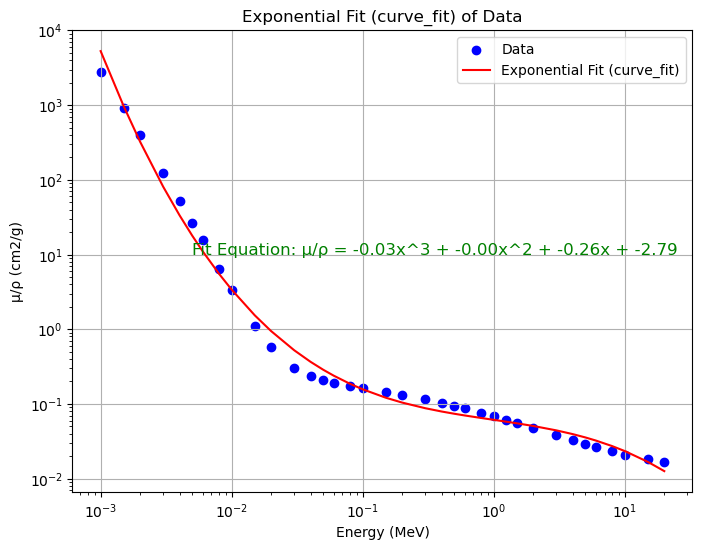

In [8]:
# Data
x = energy
y = mu_att


# Definition the function to fit
def lin_func(x, a, b, c,d):
    return a * (x**3) + b*(x**2) + c*(x) + d 

x= np.log(x)
y= np.log(y)

# Create a matrix with powers of 'x' and a constant term for regression
stacked = np.stack((x**3,x**2,x,np.ones_like(x)), axis=1)

#Sovle the linear system
result = np.linalg.lstsq(stacked, y, rcond=None)

# Get the parameters
params = result[0]



# Predict the fitted values
y_pred = lin_func(x, *params)

# Inverse log-transform to get predictions on the original scale
x = np.exp(x)
y = np.exp(y)
y_pred = np.exp(y_pred)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_pred, label='Exponential Fit (curve_fit)', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.title('Exponential Fit (curve_fit) of Data')
plt.legend()
plt.grid(True)

# Display the equation of the fit on the plot
equation = f'Fit Equation: μ/ρ = {params[0]:.2f}x^3 + {params[1]:.2f}x^2 + {params[2]:.2f}x + {params[3]:.2f}'
plt.text(0.005, 10, equation, fontsize=12, color='green')

plt.show()




### **Curve fit**

Une méthode alternative, moins rapide et moins adaptée, consiste à utiliser la fonction `curve_fit`. Cette approche implique d'utiliser des fonctions non linéaires pour ajuster le modèle aux données, ce qui peut nécessiter plus de temps de calcul que l'ajustement linéaire.

In [ ]:
from scipy.optimize import curve_fit

# Definition of the exponential function to fit
def lin_func(x, a, b, c,d):
    return a * (x**3) + b*(x**2) + c*(x) + d 

# Data
x = energy
y = mu_att

x= np.log(x)
y= np.log(y)



# Perform the regression using curve_fit
params, covariance = curve_fit(lin_func, x, y)

# Predict the fitted values
y_pred = lin_func(x, *params)
x = np.exp(x)
y = np.exp(y)
y_pred = np.exp(y_pred)

print(params)
# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_pred, label='Exponential Fit (curve_fit)', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.title('Exponential Fit (curve_fit) of Data')
plt.legend()
plt.grid(True)
plt.show()


---
## **Question 4**

4. Essayer l’interpolation linéaire en échelle logarithmique et tracer là. Est-ce que vos résultats sont meilleurs ?

---

## Interpolation Linéaire avec SciPy vs. NumPy

### SciPy
- **Bibliothèque**: SciPy
- **Fonction d'interpolation linéaire**: `scipy.interpolate.interp1d`
- **Flexibilité**: Peut gérer différents types d'interpolation, y compris linéaire, spline, polynomiale, etc.
- **Gestion de l'extrapolation**: Offre des options de gestion de l'extrapolation, ce qui est utile pour les valeurs en dehors de la plage des données d'origine.
- **Espace logarithmique**: Peut être utilisé pour des interpolations dans un espace logarithmique.

### NumPy
- **Bibliothèque**: NumPy
- **Fonction d'interpolation linéaire**: `np.interp`
- **Simplicité**: Simple et facile à utiliser pour des interpolations linéaires 1D.
- **Flexibilité limitée**: Principalement conçu pour des interpolations linéaires simples.
- **Extrapolation**: Ne gère pas directement l'extrapolation en dehors de la plage des données d'origine.
- **Espace logarithmique**: Peut être utilisé pour des interpolations dans un espace logarithmique, mais il reste a manipulé avec précaution.

**Choix dépendant du contexte**: Le choix entre SciPy et NumPy dépendra des besoins spécifiques de votre projet. Utilisez SciPy pour des interpolations plus avancées, une gestion de l'extrapolation et des espaces logarithmiques. NumPy est plus adapté pour des interpolations simples en espace linéaire.



In [9]:
from scipy.interpolate import interp1d

# Data
x = energy
y_att = mu_att
y_en = mu_en
# Interpolation points in natural logarithm scale
x_interp_ln = np.geomspace(min(x),max(x),10000)

# Perform linear interpolation in natural logarithm scale
# YOU CAN TRY TO CHANGE THE KIND OF INTERPOLATION and see the difference and also the time
interp_ln_mu_att_class = interp1d(x, y_att, kind='linear', fill_value='extrapolate')
interp_ln_mu_en_class = interp1d( x, y_en, kind='linear', fill_value='extrapolate')

y_interp_att = interp_ln_mu_att_class(x_interp_ln)
y_interp_en = interp_ln_mu_en_class(x_interp_ln)



# Lineare interpolation in the original scale using numpy

mu_att_pred = np.interp(x_interp_ln, x, y_att)
mu_en_pred = np.interp(x_interp_ln, x, y_en)

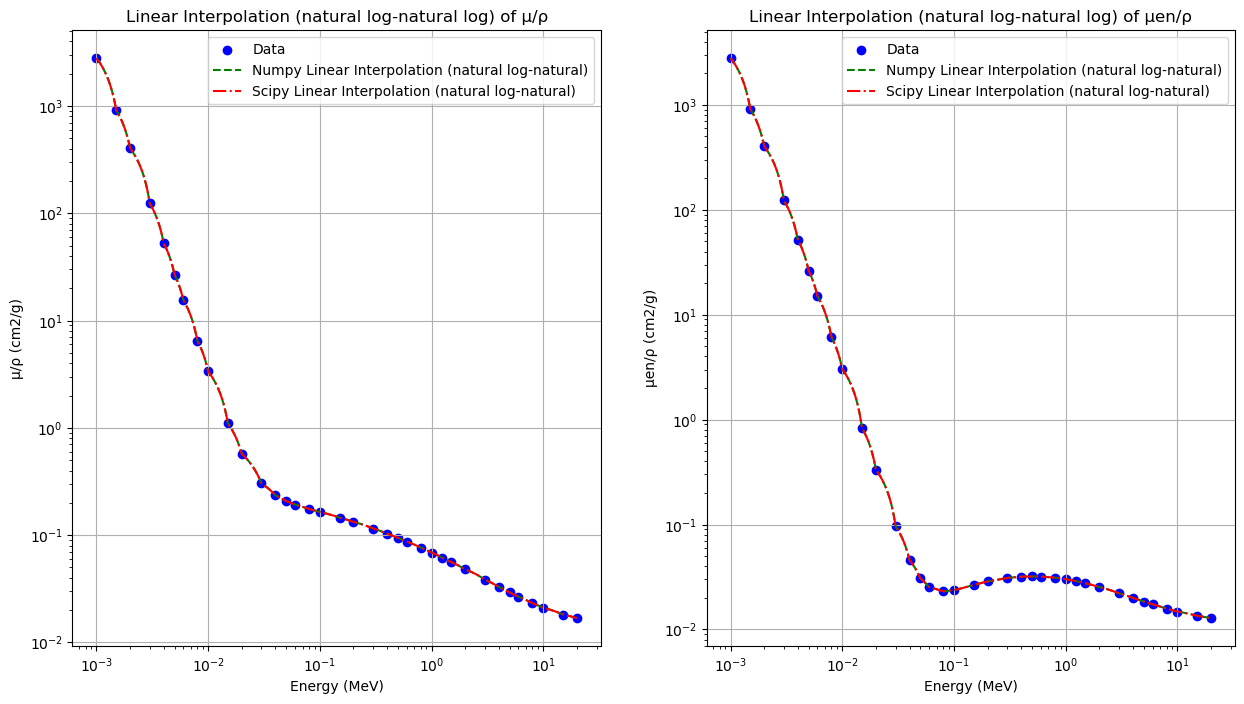

In [10]:
# Create the plot
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.scatter(x, y_att, label='Data', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.plot(x_interp_ln, mu_att_pred, label='Numpy Linear Interpolation (natural log-natural)', color='green',linestyle='--')
plt.plot(x_interp_ln, y_interp_att, label='Scipy Linear Interpolation (natural log-natural)', color='red',linestyle='-.')

plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.title('Linear Interpolation (natural log-natural log) of μ/ρ')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x, y_en, label='Data', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.plot(x_interp_ln, mu_en_pred, label='Numpy Linear Interpolation (natural log-natural)', color='green',linestyle='--')
plt.plot(x_interp_ln, y_interp_en, label='Scipy Linear Interpolation (natural log-natural)', color='red',linestyle='-.')

plt.xlabel('Energy (MeV)')
plt.ylabel('μen/ρ (cm2/g)')
plt.title('Linear Interpolation (natural log-natural log) of μen/ρ')
plt.legend()
plt.grid(True)
plt.show()

Lorsque l'on réalise une interpolation, la principale différence réside dans la base logarithmique que l'on utilise pour la transformation des données. Les concepts sont semblables à ceux précédemment expliqués pour les ajustements. Voici les distinctions essentielles pour l'interpolation :

**1. Base logarithmique :**
   - **Base 10 (log10) :** Lorsque l'on réalise une interpolation dans un espace logarithmique en base 10, on utilise la fonction logarithme décimale (logarithme en base 10) pour transformer les données avant l'interpolation. Les valeurs interpolées seront en base 10.
   - **Log naturel (ln) :** Dans un espace logarithmique en log naturel, on utilise la fonction logarithme népérien (logarithme en base e) pour transformer les données avant l'interpolation. Les valeurs interpolées seront en base e.

**2. Compatibilité avec les données :**
   - **Base 10 :** Une interpolation en base 10 est plus fréquemment utilisée lorsque les données ont une structure décimale ou lorsque l'on souhaite interpréter les valeurs interpolées de manière décimale.
   - **Log naturel :** Une interpolation en log naturel est souvent choisie lorsque les données suivent des lois mathématiques spécifiques, telles que des décroissances exponentielles, des comportements naturels liés au nombre e, ou lorsque les données sont intrinsèquement liées à e.

**3. Valeurs interpolées :**
   - **Base 10 :** Lorsque l'on réalise une interpolation en base 10, les valeurs interpolées sont en base 10, ce qui signifie que chaque unité d'écart entre les valeurs interpolées correspond à un facteur de 10. Par exemple, une valeur interpolée de 2,3 signifie que la valeur est 10^2,3.
   - **Log naturel :** Dans une interpolation en log naturel, les valeurs interpolées sont en base e, ce qui signifie que chaque unité d'écart correspond à un facteur e. Par exemple, une valeur interpolée de 2,3 signifie que la valeur est e^2,3.

Le choix de la base logarithmique pour l'interpolation dépend de la nature des données et de l'objectif de l'interpolation. La base 10 est plus courante lorsque des variations décimales sont pertinentes, tandis que le log naturel est préféré pour des phénomènes naturels ou mathématiques spécifiques liés à e.


In [11]:
# Voici comment bien commenter votre code:

def interpolation_natural_log_scipy(energy: np.ndarray ,mu: np.ndarray,kind='linear')-> tuple[np.ndarray, np.ndarray]:
    
    """
    Interpolation of the data in natural logarithm scale using scipy
    Parameters
    ----------
    energy : np.ArrayLike
        The energy values
    mu : np.ArrayLike
        The mu values
    kind : str, optional
        The kind of interpolation, by default 'linear'
    Returns
    -------
    ArrayLike
        The interpolation function
    ArrayLike
        The interpolation points
    """
    
    # Convert to natural logarithm scal
    x_energy = np.log(energy)
    y_mu = np.log(mu)
    
    # Interpolation points in natural logarithm scale
    x_interp_ln = np.linspace(min(x_energy),max(x_energy),10000)
    
    # Perform linear interpolation in natural logarithm scale
    interp_ln_mu_class = interp1d(x_energy,y_mu, kind=kind, fill_value='extrapolate')
    interp_ln_mu = interp_ln_mu_class(x_interp_ln)
    
    return (np.exp(interp_ln_mu), np.exp(x_interp_ln))

In [12]:
def interpolation_natural_log_numpy(energy: np.ndarray,mu: np.ndarray, x_interp: np.ndarray)-> tuple[np.ndarray,np.ndarray]:
    
    """
    Interpolation of the data in natural logarithm scale using numpy
    Parameters
    ----------
    energy : np.ArrayLike
        The energy values
    mu : np.ArrayLike
        The mu values
    x_interp : np.ArrayLike
        The interpolation points
    Returns
    -------
    ArrayLike
        The interpolation function
    ArrayLike
        The interpolation points
    """
    
   
    # Convert to natural logarithm scal
    x_energy = np.log(energy)
    y_mu = np.log(mu)
    
    # Interpolation points in natural logarithm scale
    x_interp_ln = np.log(x_interp)
    
    # Perform linear interpolation in natural logarithm scale
    interp_ln_mu = np.interp(x_interp_ln, x_energy, y_mu)
    
    return np.exp(interp_ln_mu), np.exp(x_interp_ln)

In [13]:
# Perfome the interpolation in natural log 

x_interp = np.linspace(min(energy),max(energy),10000)

# Performed with numpy
y_interp_mu_att_np, x_interp_energy_np = interpolation_natural_log_numpy(energy, mu_att,x_interp)
y_interp_mu_en_np, x_interp_energy_np = interpolation_natural_log_numpy(energy, mu_en,x_interp)

# Performed with scipy
y_interp_mu_att_scipy, x_interp_energy_scipy = interpolation_natural_log_scipy(energy, mu_att)
y_interp_mu_en_scipy, x_interp_energy_scipy = interpolation_natural_log_scipy(energy, mu_en)




%timeit interpolation_natural_log_numpy(energy, mu_att,x_interp)

%timeit interpolation_natural_log_scipy(energy, mu_att)

94.4 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
371 µs ± 5.53 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


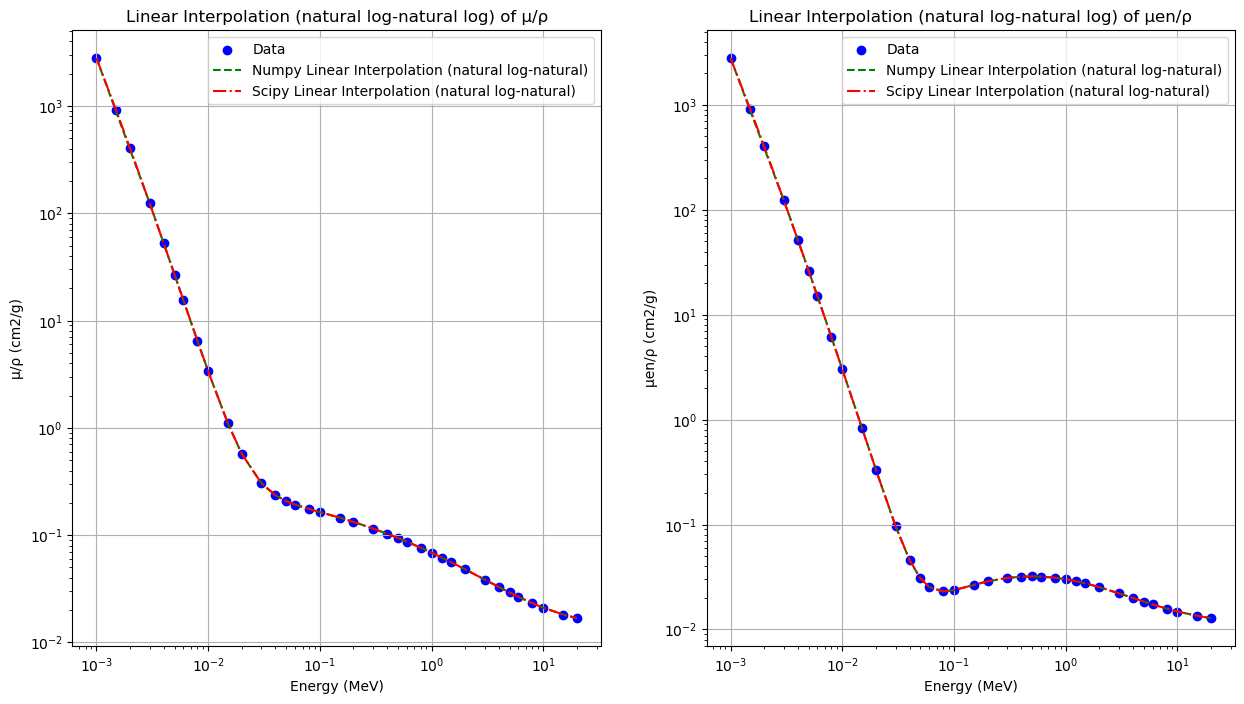

In [14]:
# Create the plot
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.scatter(energy, mu_att, label='Data', color='blue')
plt.plot(x_interp_energy_np, y_interp_mu_att_np, label='Numpy Linear Interpolation (natural log-natural)', color='green', linestyle='--')
plt.plot(x_interp_energy_scipy, y_interp_mu_att_scipy, label='Scipy Linear Interpolation (natural log-natural)', color='red', linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.title('Linear Interpolation (natural log-natural log) of μ/ρ')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(energy, mu_en, label='Data', color='blue')
plt.plot(x_interp_energy_np, y_interp_mu_en_np, label='Numpy Linear Interpolation (natural log-natural)', color='green', linestyle='--')
plt.plot(x_interp_energy_scipy, y_interp_mu_en_scipy, label='Scipy Linear Interpolation (natural log-natural)', color='red', linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('μen/ρ (cm2/g)')
plt.title('Linear Interpolation (natural log-natural log) of μen/ρ')
plt.legend()
plt.grid(True)
plt.show()


## **Question 5**

5. Le site internet de questions réponses stackoverflow propose une fonction d’ajustement qui a retenu notre attention. Qu’en pensez-vous ?
https://stackoverflow.com/questions/29346292/logarithmic-interpolation-in-python

In [15]:
def interpolation_log10(energy: np.ndarray,mu: np.ndarray, x_interp: np.ndarray)-> tuple[np.ndarray,np.ndarray]:
    
    """
    Interpolation of the data in natural logarithm scale using numpy
    Parameters
    ----------
    energy : np.ArrayLike
        The energy values
    mu : np.ArrayLike
        The mu values
    x_interp : np.ArrayLike
        The interpolation points
    Returns
    -------
    ArrayLike
        The interpolation function
    ArrayLike
        The interpolation points
    """
    # Interpolation points in natural logarithm scale
    # Convert to natural logarithm scal
    x_energy = np.log10(energy)
    y_mu = np.log10(mu)
    
    lin_interp = interp1d(x_energy, y_mu, kind='linear', fill_value='extrapolate')
    # Perform linear interpolation in natural logarithm scale
    interp_ln_mu = np.power(10.0,lin_interp(np.log10(x_interp)))
    
    return interp_ln_mu, x_interp

[ True  True  True ...  True  True  True]


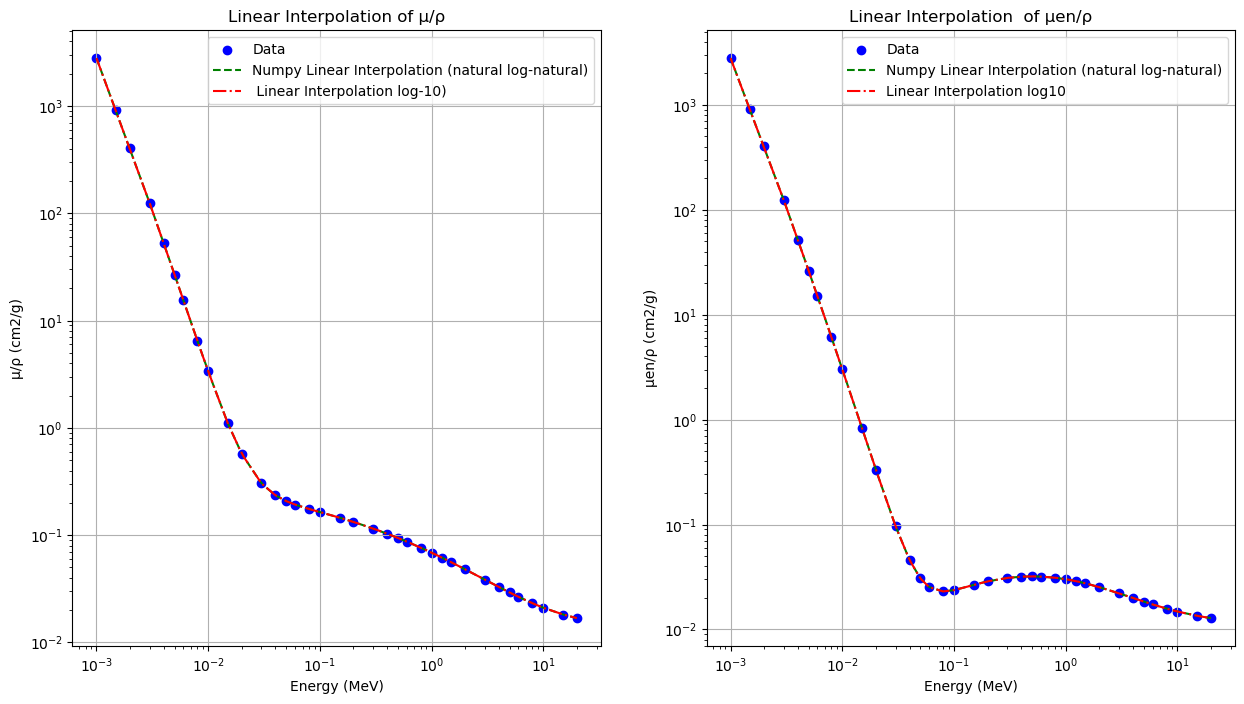

 Are the interpolation close togheter :
 for attenuation -> True 
 for absorption -> True


In [16]:


# creation of the interpolation points LOG10
x_interp_log10 = np.linspace(np.min(energy),np.max(energy),10000)
print(x_interp_log10==x_interp)

# Interpolation using LOG10
interpolation_log10_mu_att, x_energy = interpolation_log10(energy, mu_att,x_interp_log10)
interpolation_log10_mu_en, x_energy = interpolation_log10(energy, mu_en,x_interp_log10)

#### Interpolation using numpy###

y_interp_mu_att_np, x_interp_energy_np = interpolation_natural_log_numpy(energy, mu_att,x_interp)
y_interp_mu_en_np, x_interp_energy_np = interpolation_natural_log_numpy(energy, mu_en,x_interp)

# Convert data using natural logarithm (ln, base e)


# Create the plot
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.scatter(energy, mu_att, label='Data', color='blue')
plt.plot(x_interp_energy_np, y_interp_mu_att_np, label='Numpy Linear Interpolation (natural log-natural)', color='green',linestyle='--')
plt.plot(x_energy, interpolation_log10_mu_att , label=' Linear Interpolation log-10)', color='red',linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.title('Linear Interpolation of μ/ρ')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(energy, mu_en, label='Data', color='blue')
plt.plot(x_interp_energy_np, y_interp_mu_en_np, label='Numpy Linear Interpolation (natural log-natural)', color='green',linestyle='--')
plt.plot(x_energy, interpolation_log10_mu_en, label='Linear Interpolation log10', color='red',linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('μen/ρ (cm2/g)')
plt.title('Linear Interpolation  of μen/ρ')
plt.legend()
plt.grid(True)
plt.show()


print( ' Are the interpolation close togheter :\n for attenuation ->', np.allclose(interpolation_log10_mu_att, y_interp_mu_att_np),'\n for absorption ->', np.allclose(interpolation_log10_mu_en, y_interp_mu_en_np))


 ---
 ## **Question 6**
 6. Avec votre meilleur ajustement, trouver les valeurs de $\mu_{att}$ et $\mu_{en}$ pour des énergies de faisceaux de photons de 20 keV, 140 keV, 6 MeV et 18 MeV.

---


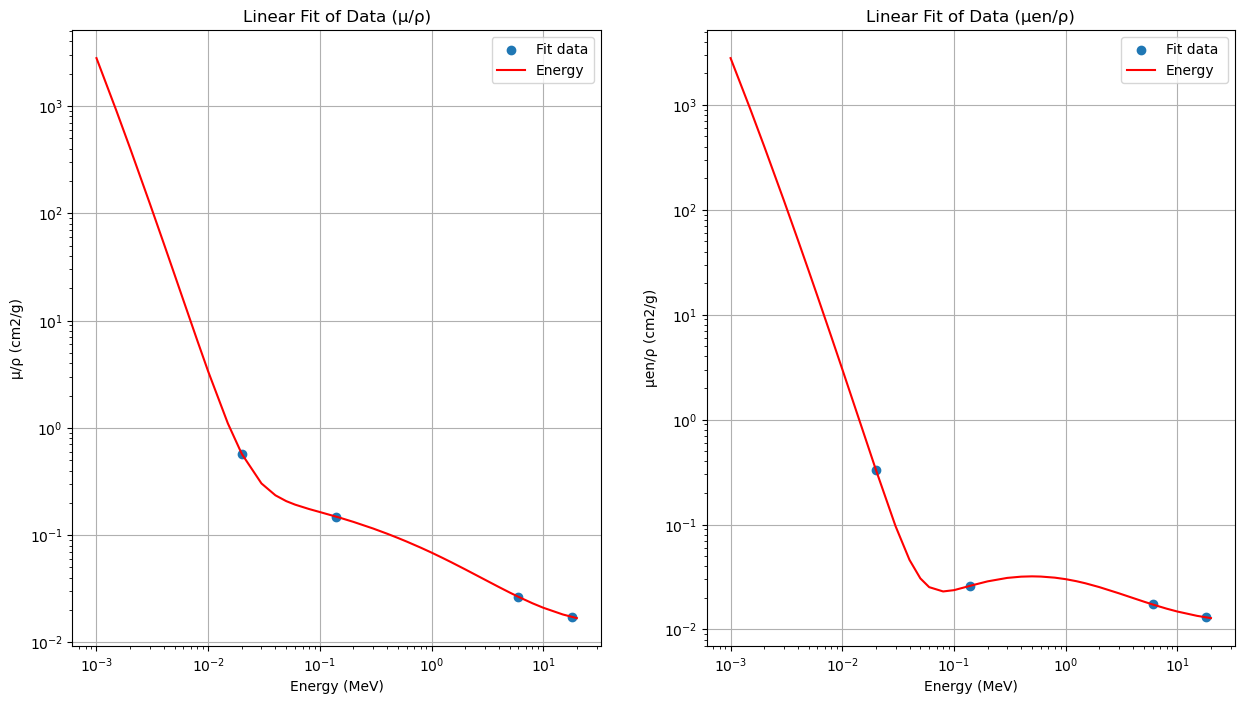

In [17]:
# Define a new array of energy values for predictions
newEnergy = np.array([0.02, 0.140, 6, 18])

# Perform linear interpolation on mu_att and mu_en for the new energy values
# using logarithmic space
mu_att_pred, _ = interpolation_natural_log_numpy(energy, mu_att, newEnergy)
mu_en_pred, _ = interpolation_natural_log_numpy(energy, mu_en, newEnergy)

# Create a 1x2 subplot figure for visualization
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)

# Plot the mu_att predictions and the original mu_att data
plt.scatter(newEnergy, mu_att_pred, label='Fit data')
plt.plot(energy, mu_att , color='red', label='Energy')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Linear Fit of Data (μ/ρ)')
plt.xlabel('Energy (MeV)')
plt.ylabel('μ/ρ (cm2/g)')
plt.grid(True)

# Create the second subplot for mu_en
plt.subplot(1, 2, 2)

# Plot the mu_en predictions and the original mu_en data
plt.scatter(newEnergy, mu_en_pred, label='Fit data ')
plt.plot(energy, mu_en , color='red', label='Energy')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Linear Fit of Data (μen/ρ)')
plt.xlabel('Energy (MeV)')
plt.ylabel('μen/ρ (cm2/g)')
plt.grid(True)

# Show both subplots
plt.show()

In [18]:
# Print the results in a table
print(tab.tabulate(np.array([newEnergy, mu_att_pred, mu_en_pred]).T, headers=['Energy (MeV)', 'μ/ρ (cm2/g)', 'μen/ρ (cm2/g)'],tablefmt='fancy_outline'))

╒════════════════╤═══════════════╤═════════════════╕
│   Energy (MeV) │   μ/ρ (cm2/g) │   μen/ρ (cm2/g) │
╞════════════════╪═══════════════╪═════════════════╡
│           0.02 │     0.5714    │       0.3328    │
│           0.14 │     0.148594  │       0.0260545 │
│           6    │     0.02659   │       0.01731   │
│          18    │     0.0173259 │       0.0130579 │
╘════════════════╧═══════════════╧═════════════════╛


---
## **Context** 

Pour les prochaines questions, on considère une fluence de $10^{11}$ photons par $cm^{2}$ mesurée à 1m de la source. On dispose d’un fantôme de PMMA de 1m de hauteur, dont la surface est placée à 1m de la source.

---


---
## **Question 1**

1. Calculer la dose absorbée à l’équilibre électronique à la surface du fantôme. Commenter.



## Rappel 

\begin{equation}
    D_{surface}= Energie \times \mu_{en} \times \phi
\end{equation}
---




In [19]:
flux = 1e11
mass = 1e-3

# Define a function to compute dose
def compute_dose(mu_en : np.ndarray , rho: float, flux : float , mass : float , energy: np.ndarray) -> np.ndarray:
    """
    Compute the dose at the surface for a given linear attenuation coefficient (mu_en_pred) and a given energy (newEnergy),
    
    Parameters
    ----------
    mu_en : np.ndarray
        The linear attenuation coefficient cm^2/g
    rho : float
        The density g/cm^3
    flux : float
        The flux value cm^-2
    mass : flaot
        The mass value g
    energy : np.ndarray
        The energy values MeV
    Returns 
    -------
    np.ndarray
        The dose values
    """
    return (energy * 1e6 * 1.602e-19 * mu_en * flux) / mass

# Calculate the dose for a given linear attenuation coefficient (mu_en_pred),
# density (rho), flux, mass, and a set of energy values (newEnergy)
dose_surface = compute_dose(mu_en_pred, 1.19, flux, mass, newEnergy)


In [20]:
print(tab.tabulate(np.array([newEnergy, dose_surface]).T, headers=['Energy (MeV)', 'Dose (Gy)'],tablefmt='fancy_outline'))

╒════════════════╤═════════════╕
│   Energy (MeV) │   Dose (Gy) │
╞════════════════╪═════════════╡
│           0.02 │   0.106629  │
│           0.14 │   0.0584349 │
│           6    │   1.66384   │
│          18    │   3.76537   │
╘════════════════╧═════════════╛


## **Question 2**

2. Calculer et afficher les valeurs de la dose en fonction de la profondeur pour chacun des 4 faisceaux étudiés, en considérant un faisceau parallèle. Commenter.

## Rappel :

\begin{equation}
    D_{depth parallel}= D_{surface} \times e^{\mu_{att} \times depth} 
\end{equation}


In [21]:
depth = np.linspace(0, 100, 1001)
from typing import Union

# Define a function to compute dose with parrallel beam using the dose at th surface 
def compute_dose_depth_parallel(dose_surface: np.ndarray, depth: Union[np.ndarray,float,int], mu_att: np.ndarray ,rho: float) -> np.ndarray:
    """
    
    compute_dose_depth_parallel is a function that compute the dose at a given depth using the dose at the surface and the linear attenuation coefficient
    for a parallel beam

    Parameters
    ----------
    dose_surface : np.ndarray
        dose at the surface
    depth : Union[np.ndarray,float,int]
        depth in cm
    mu_att : np.ndarray
        linear attenuation coefficient cm^2/g
    rho : float
        density g/cm^3

    Returns
    -------
    np.ndarray
        dose at the depth
    """
    
    doseParallel = []
    for i in range(dose_surface.shape[0]):
        doseParallel.append(dose_surface[i] * np.exp(-mu_att[i] * rho * depth))
    return np.asarray(doseParallel)


doseDepthParallel = compute_dose_depth_parallel(dose_surface, depth, mu_att_pred, 1.19)
print(doseDepthParallel.shape)



(4, 1001)


**The percentage depth dose, must be depicted normalized to the max.**

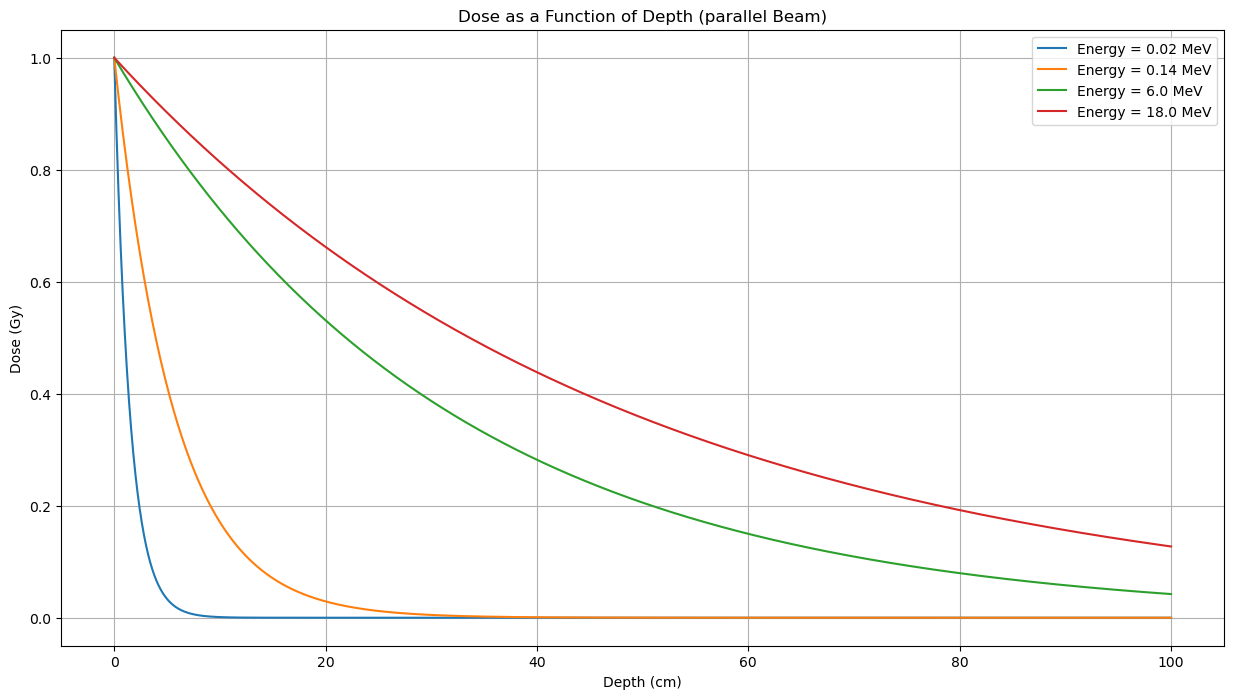

In [22]:
plt.figure(figsize=(15, 8))

# I iterate to plot the dose as a function of depth for each energy,
# normalizing it with respect to the maximum dose for each energy.
for i in range(doseDepthParallel.shape[0]):
    plt.plot(depth, doseDepthParallel[i]/np.max(doseDepthParallel[i]), label='Energy = ' + str(newEnergy[i]) + ' MeV')
    
plt.legend()
plt.title('Dose as a Function of Depth (parallel Beam)')
plt.xlabel('Depth (cm)')
plt.ylabel('Dose (Gy)')
plt.grid(True)
plt.show()

## **Question 3**

On considère que le faisceau est **divergent**. Calculer et tracer la dose en fonction de la profondeur (pas de 1mm). **Normaliser** au maximum de dose puis tracer sur le même graphe les quatre rendements en profondeur de la dose absorbée due aux photons primaires. Commenter au regard des rendements en profondeur vus en cours ou trouvés sur internet.

\begin{equation}
    D_{depth divergent}= D_{depth parallel} \times \left(\frac{distanceSourceSurface}{distanceSourceDepth}\right)^{2} 
\end{equation}

In [23]:
# From the parallel beam dose-depth curve, compute the dose for a divergent beam
def compute_dose_depth_divergent(dose_depth: Union[np.ndarray,int,float], depth: Union[np.ndarray,int,float])-> np.ndarray:
    
    """compute_dose_depth_divergent _summary_

    compute_dose_depth_divergent is a function that compute the dose for a divergent beam at a given depth 
    using the dose for a parrallel beam at a depth and the linear attenuation coefficient
    _extended_summary_

    Parameters
    ----------
    dose_depth : Union[np.ndarray,int,float]
        dose at a given depth for a parallel beam
    depth : Union[np.ndarray,int,float]
        depth in cm

    Returns
    -------
    np.ndarray
        _description_
    """
    return np.asarray(dose_depth * (100/(100+depth))**2)

doseDepthDivergent = compute_dose_depth_divergent(doseDepthParallel, depth)

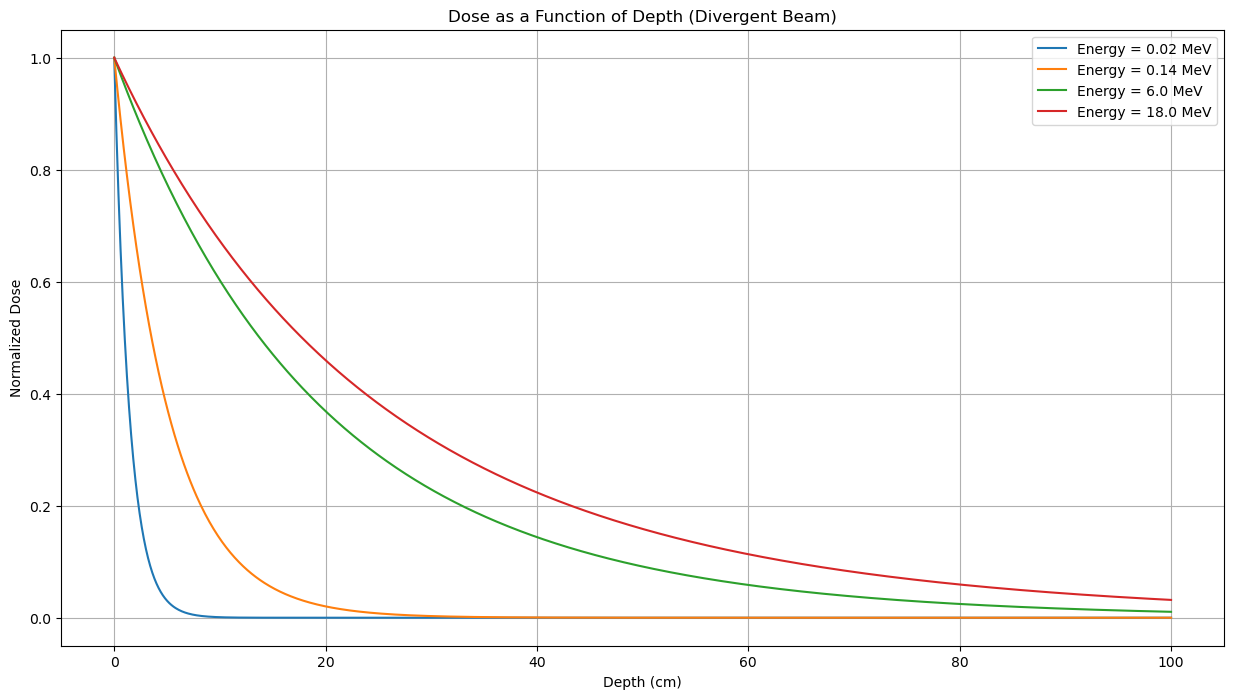

In [24]:
plt.figure(figsize=(15, 8))

# I iterate to plot the dose as a function of depth for each energy,
# normalizing it with respect to the maximum dose for each energy.
for i in range(doseDepthDivergent.shape[0]):
    plt.plot(depth, doseDepthDivergent[i] / np.max(doseDepthDivergent[i]), label='Energy = ' + str(newEnergy[i]) + ' MeV')

plt.legend()
plt.title('Dose as a Function of Depth (Divergent Beam)')
plt.xlabel('Depth (cm)')
plt.ylabel('Normalized Dose')
plt.grid(True)
plt.show()

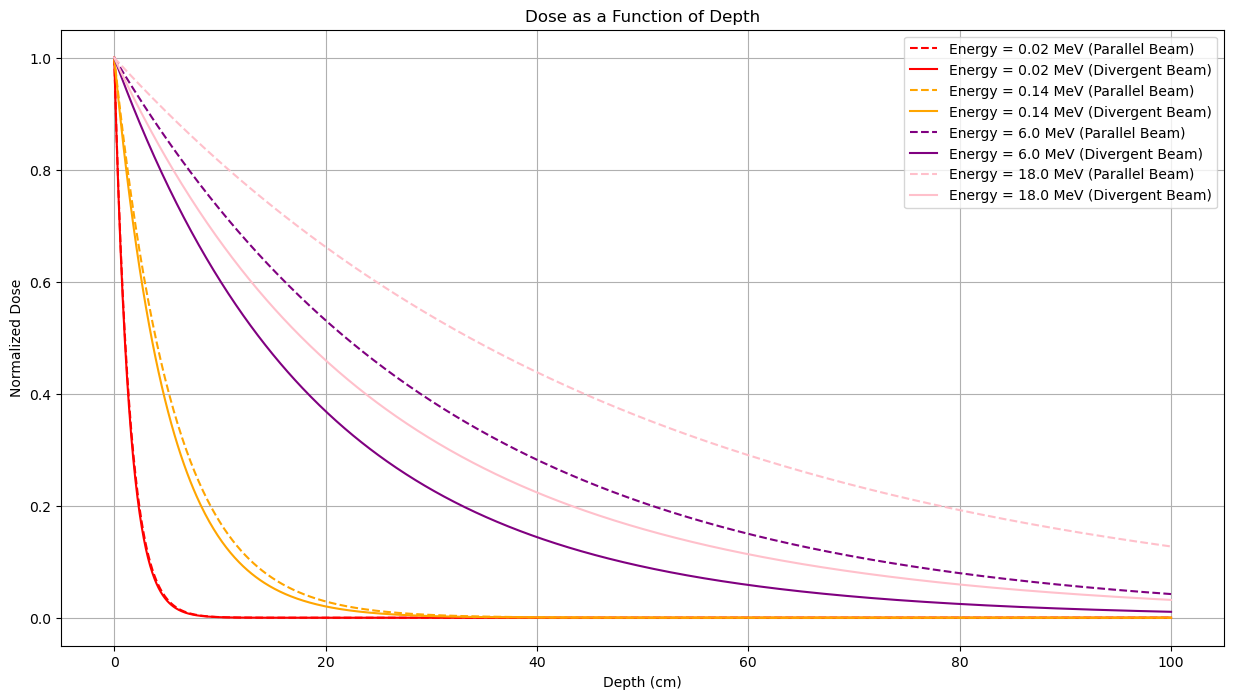

In [25]:
# Plot them together
import random
# to go a little bit deeper ,randomely choose a color for each energy 
available_colors = ["red", "blue", "green", "purple", "orange", "pink"]


plt.figure(figsize=(15, 8))
for i in range(doseDepthDivergent.shape[0]):
    # pick a random color for each energy
    c= random.choice(available_colors)
    # we don't want to have the same color for the two energy
    available_colors.remove(c)
    # plot the two curves 
    plt.plot(depth, doseDepthParallel[i]/np.max(doseDepthParallel[i]), label='Energy = ' + str(newEnergy[i]) + ' MeV (Parallel Beam)',linestyle='--',color=c)
    plt.plot(depth, doseDepthDivergent[i] / np.max(doseDepthDivergent[i]), label='Energy = ' + str(newEnergy[i]) + ' MeV (Divergent Beam)',color=c)
plt.legend()
plt.title('Dose as a Function of Depth')
plt.xlabel('Depth (cm)')
plt.ylabel('Normalized Dose')
plt.grid(True)
plt.show()

In [26]:
dose50cm = doseDepthDivergent[:,np.where(depth == 50)[0]].ravel()
print(tab.tabulate(np.array([newEnergy, dose50cm]).T, headers=['Energy (MeV)', 'Dose at 50 cm (Gy)'],tablefmt='fancy_outline'))

╒════════════════╤══════════════════════╕
│   Energy (MeV) │   Dose at 50 cm (Gy) │
╞════════════════╪══════════════════════╡
│           0.02 │          8.13616e-17 │
│           0.14 │          3.75621e-06 │
│           6    │          0.151995    │
│          18    │          0.596919    │
╘════════════════╧══════════════════════╛


## **Question 5**

On souhaite, pour une application en radioprotection, avoir une **fluence en sortie** du fantôme de 1 photon/mm2. Calculer la dose en entrée correspondante, ainsi que la dose à 10 cm de profondeur. Commenter.

In [27]:
flux_End = 1e2
mass = 1e-3
def compute_Flux(mu_att: np.ndarray, rho : float , flux_End: float)-> float:
    """compute_Flux _summary_
    compute the flux at the entrance of the phantom from the flux at the end of the phantom

    Parameters
    ----------
    mu_att : np.ndarray
        The linear attenuation coefficient cm^2/g
    rho : float
        density g/cm^3
    flux_End : float
        The flux value cm^-2

    Returns
    -------
    float
        The flux value at the entrance of the phantom
    """
    return (flux_End / np.exp(-mu_att * rho * 100))* (200/100)**2


flux_Entre = compute_Flux(mu_att_pred, 1.19, flux_End)
flux_Entre

array([1.35708847e+32, 1.91223200e+10, 9.46801493e+03, 3.14397513e+03])

In [28]:
print(tab.tabulate(np.array([newEnergy, flux_Entre]).T, headers=['Energy (MeV)', 'Flux enter (cm-2)'],tablefmt='fancy_outline'))

╒════════════════╤═════════════════════╕
│   Energy (MeV) │   Flux enter (cm-2) │
╞════════════════╪═════════════════════╡
│           0.02 │         1.35709e+32 │
│           0.14 │         1.91223e+10 │
│           6    │      9468.01        │
│          18    │      3143.98        │
╘════════════════╧═════════════════════╛
